# WRF-Hydro run01_d03 (NoahMP, no routing)

In [1]:
%config InlineBackend.figure_format='png'
%matplotlib inline

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import cartopy.crs as crs

# import glob

from netCDF4 import Dataset as ds
import xarray as xr
import cftime
from datetime import datetime
# from netCDF4 import MFDataset as mfds

In [3]:
era5_dir = "/gpfs/wolf/cli120/proj-shared/h1x/wrfhydro_cacti/era5-land/regridded/d03"
era5o_dir = "/gpfs/wolf/cli120/proj-shared/h1x/wrfhydro_cacti/era5-land/no_lake_data"
wrf_dir = "/gpfs/wolf/cli120/proj-shared/h1x/wrfhydro_cacti/wrfhydro_run/run01_d03/out"
geogrid = ds('/gpfs/wolf/cli120/proj-shared/h1x/wrfhydro_cacti/geogrid/geo_em.d03.nc')

## First Layer Soil Moisture and Temperature

### 2018/08/01

In [4]:
t = "201808010000"
wrf = ds("{:s}/{:s}.LDASOUT_DOMAIN3".format(wrf_dir, t))
era5o = ds("{:s}/ecmf_{:s}_an_sfc_unpacked.nc".format(era5o_dir, t[0:8]))
wrf_lats = geogrid['XLAT_M'][0,:,:]
wrf_lons = geogrid['XLONG_M'][0,:,:]
era5_lons, era5_lats = np.meshgrid(era5o['longitude'], era5o['latitude'])
it = cftime.date2index(datetime.strptime(t, "%Y%m%d%H%M%S"), era5o['time'])
swvl1_era = ds("{:s}/swvl1_{:s}.nc".format(era5_dir, t))['swvl1'][:]
# swvl2_era = ds("{:s}/swvl2_{:s}.nc".format(era5_dir, t))['swvl2'][:]
# swvl3_era = ds("{:s}/swvl3_{:s}.nc".format(era5_dir, t))['swvl3'][:]
# swvl4_era = ds("{:s}/swvl4_{:s}.nc".format(era5_dir, t))['swvl4'][:]
stl1_era = ds("{:s}/stl1_{:s}.nc".format(era5_dir, t))['stl1'][:]
# stl2_era = ds("{:s}/stl2_{:s}.nc".format(era5_dir, t))['stl2'][:]
# stl3_era = ds("{:s}/stl3_{:s}.nc".format(era5_dir, t))['stl3'][:]
# stl4_era = ds("{:s}/stl4_{:s}.nc".format(era5_dir, t))['stl4'][:]

<ipython-input-4-2ebd874c9c58>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wrf_lats = geogrid['XLAT_M'][0,:,:]
<ipython-input-4-2ebd874c9c58>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wrf_lons = geogrid['XLONG_M'][0,:,:]
<ipython-input-4-2ebd874c9c58>:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  it = cftime.

<ipython-input-5-40b2a7519a56>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_M'][0,:,0,:],
<ipython-input-5-40b2a7519a56>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
<ipython-input-5-40b2a7519a56>:22: DeprecationWarning: `np.bool` is 

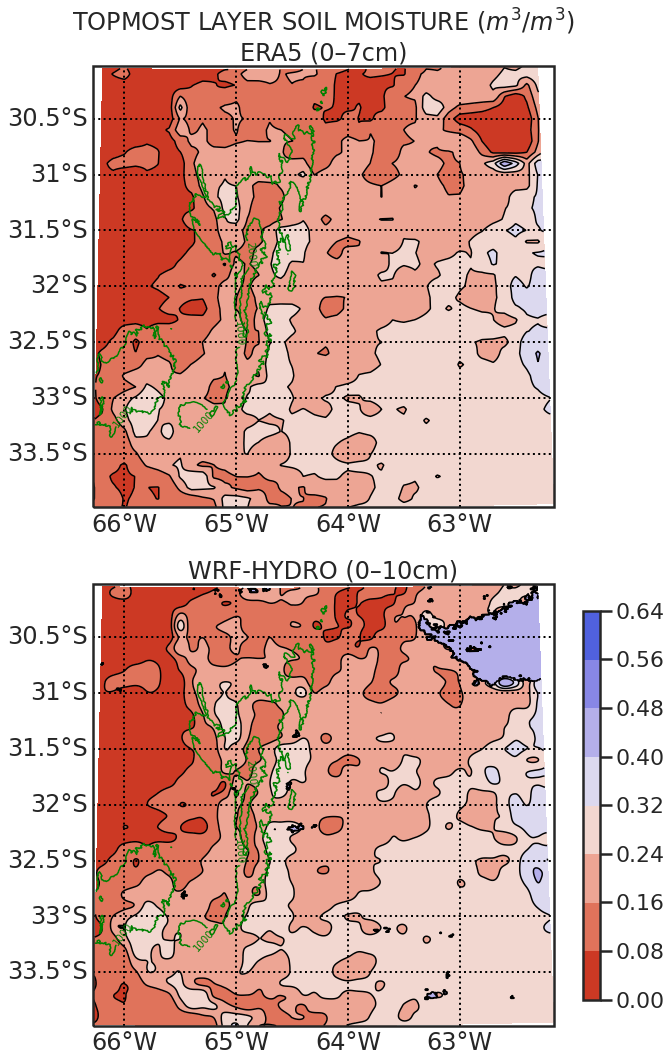

In [5]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = np.arange(250., 291., 5.)
levs = np.arange(0., 0.65, 0.08)
# levs = None
tlevs = np.arange(0., 6001., 1000.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_M'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax1.clabel(tct, inline=1, fontsize=10, fmt='%4.0f')
ct = ax1.contourf(wrf_lons, wrf_lats,  wrf['SOIL_M'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('WRF-HYDRO (0–10cm)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
tct2 = ax2.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax2.clabel(tct2, inline=1, fontsize=10, fmt='%4.0f')
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'TOPMOST LAYER SOIL MOISTURE ($m^3/m^3$)' '\n' 'ERA5 (0–7cm)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
# fig.suptitle(r"Topmost Layer Soil Moisture ($m^3/m^3$)", fontsize=24)
plt.colorbar(ct, cax=cax)
plt.show()

<ipython-input-6-09c35e2d2786>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_T'][0,:,0,:],
<ipython-input-6-09c35e2d2786>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
<ipython-input-6-09c35e2d2786>:21: DeprecationWarning: `np.bool` is 

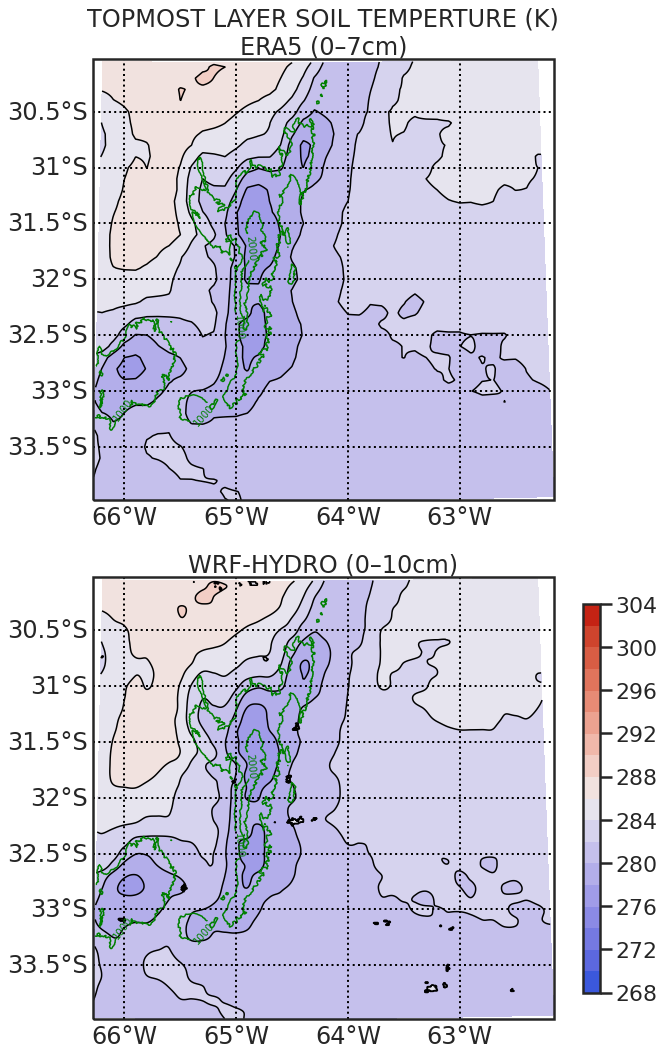

In [6]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(268., 304.1, 2.)
tlevs = np.arange(0., 6001., 1000.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_T'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax1.clabel(tct, inline=1, fontsize=10, fmt='%4.0f')
ct = ax1.contourf(wrf_lons, wrf_lats,  wrf['SOIL_T'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('WRF-HYDRO (0–10cm)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
tct2 = ax2.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax2.clabel(tct2, inline=1, fontsize=10, fmt='%4.0f')
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'TOPMOST LAYER SOIL TEMPERTURE (K)' '\n' 'ERA5 (0–7cm)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

### 2018/10/26

In [7]:
t = "201810260000"
wrf = ds("{:s}/{:s}.LDASOUT_DOMAIN3".format(wrf_dir, t))
era5o = ds("{:s}/ecmf_{:s}_an_sfc_unpacked.nc".format(era5o_dir, t[0:8]))
wrf_lats = geogrid['XLAT_M'][0,:,:]
wrf_lons = geogrid['XLONG_M'][0,:,:]
era5_lons, era5_lats = np.meshgrid(era5o['longitude'], era5o['latitude'])
it = cftime.date2index(datetime.strptime(t, "%Y%m%d%H%M%S"), era5o['time'])
swvl1_era = ds("{:s}/swvl1_{:s}.nc".format(era5_dir, t))['swvl1'][:]
# swvl2_era = ds("{:s}/swvl2_{:s}.nc".format(era5_dir, t))['swvl2'][:]
# swvl3_era = ds("{:s}/swvl3_{:s}.nc".format(era5_dir, t))['swvl3'][:]
# swvl4_era = ds("{:s}/swvl4_{:s}.nc".format(era5_dir, t))['swvl4'][:]
stl1_era = ds("{:s}/stl1_{:s}.nc".format(era5_dir, t))['stl1'][:]
# stl2_era = ds("{:s}/stl2_{:s}.nc".format(era5_dir, t))['stl2'][:]
# stl3_era = ds("{:s}/stl3_{:s}.nc".format(era5_dir, t))['stl3'][:]
# stl4_era = ds("{:s}/stl4_{:s}.nc".format(era5_dir, t))['stl4'][:]

<ipython-input-7-003863207684>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wrf_lats = geogrid['XLAT_M'][0,:,:]
<ipython-input-7-003863207684>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wrf_lons = geogrid['XLONG_M'][0,:,:]
<ipython-input-7-003863207684>:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  it = cftime.

<ipython-input-9-40b2a7519a56>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_M'][0,:,0,:],
<ipython-input-9-40b2a7519a56>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
<ipython-input-9-40b2a7519a56>:22: DeprecationWarning: `np.bool` is 

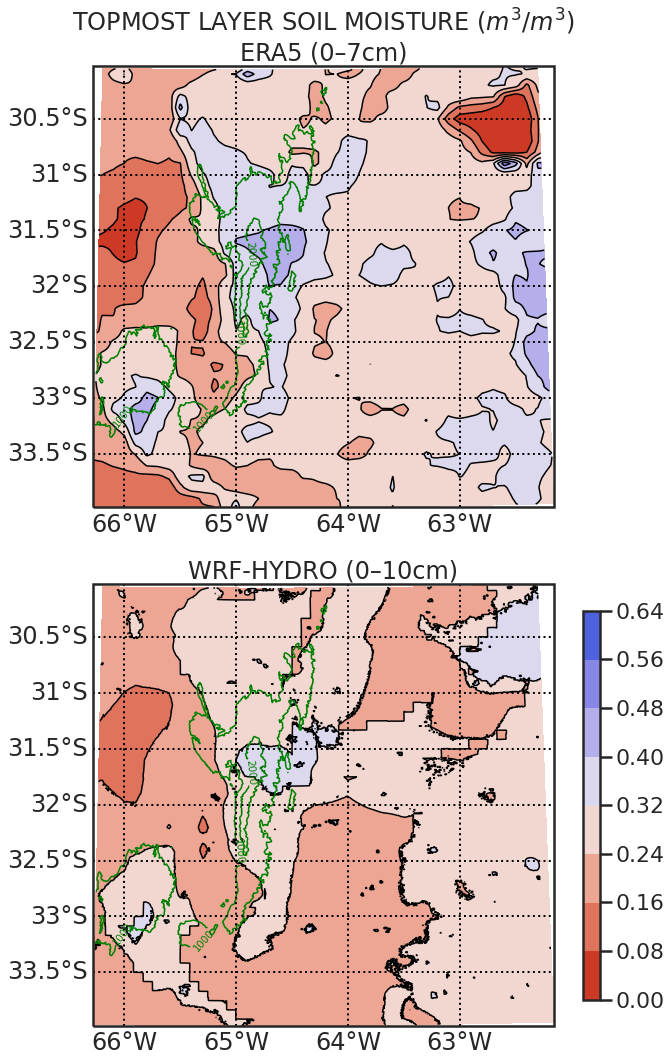

In [9]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = np.arange(250., 291., 5.)
levs = np.arange(0., 0.65, 0.08)
# levs = None
tlevs = np.arange(0., 6001., 1000.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_M'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax1.clabel(tct, inline=1, fontsize=10, fmt='%4.0f')
ct = ax1.contourf(wrf_lons, wrf_lats,  wrf['SOIL_M'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('WRF-HYDRO (0–10cm)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
tct2 = ax2.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax2.clabel(tct2, inline=1, fontsize=10, fmt='%4.0f')
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'TOPMOST LAYER SOIL MOISTURE ($m^3/m^3$)' '\n' 'ERA5 (0–7cm)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
# fig.suptitle(r"Topmost Layer Soil Moisture ($m^3/m^3$)", fontsize=24)
plt.colorbar(ct, cax=cax)
plt.show()

<ipython-input-10-09c35e2d2786>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_T'][0,:,0,:],
<ipython-input-10-09c35e2d2786>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
<ipython-input-10-09c35e2d2786>:21: DeprecationWarning: `np.bool` 

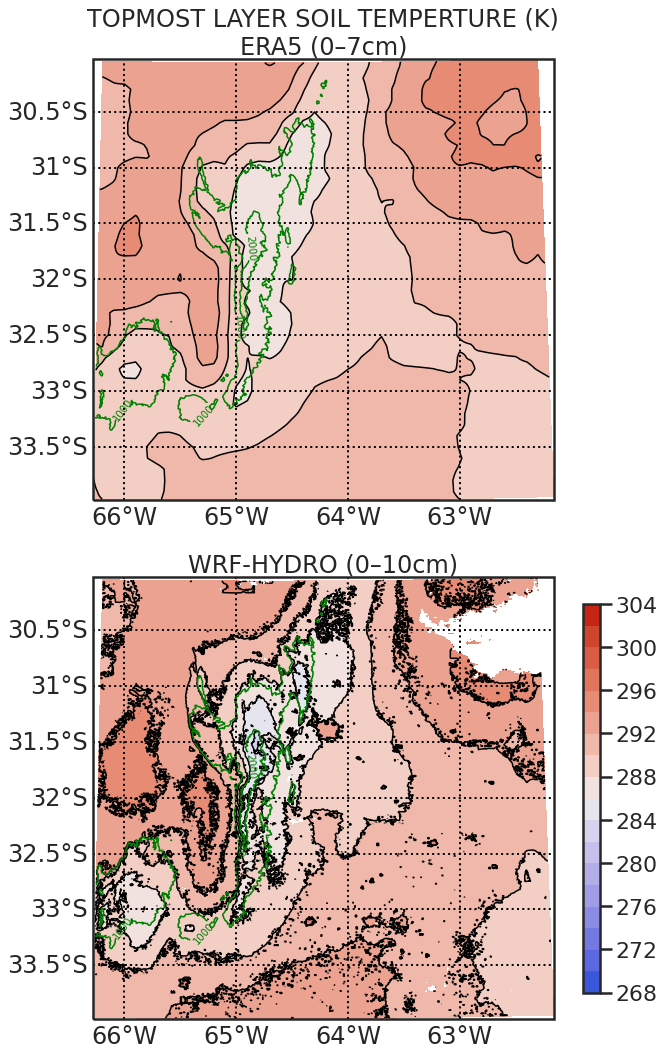

In [10]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(268., 304.1, 2.)
tlevs = np.arange(0., 6001., 1000.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_T'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax1.clabel(tct, inline=1, fontsize=10, fmt='%4.0f')
ct = ax1.contourf(wrf_lons, wrf_lats,  wrf['SOIL_T'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('WRF-HYDRO (0–10cm)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
tct2 = ax2.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax2.clabel(tct2, inline=1, fontsize=10, fmt='%4.0f')
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'TOPMOST LAYER SOIL TEMPERTURE (K)' '\n' 'ERA5 (0–7cm)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

### 2019/03/15

In [11]:
t = "201903150000"
wrf = ds("{:s}/{:s}.LDASOUT_DOMAIN3".format(wrf_dir, t))
era5o = ds("{:s}/ecmf_{:s}_an_sfc_unpacked.nc".format(era5o_dir, t[0:8]))
wrf_lats = geogrid['XLAT_M'][0,:,:]
wrf_lons = geogrid['XLONG_M'][0,:,:]
era5_lons, era5_lats = np.meshgrid(era5o['longitude'], era5o['latitude'])
it = cftime.date2index(datetime.strptime(t, "%Y%m%d%H%M%S"), era5o['time'])
swvl1_era = ds("{:s}/swvl1_{:s}.nc".format(era5_dir, t))['swvl1'][:]
# swvl2_era = ds("{:s}/swvl2_{:s}.nc".format(era5_dir, t))['swvl2'][:]
# swvl3_era = ds("{:s}/swvl3_{:s}.nc".format(era5_dir, t))['swvl3'][:]
# swvl4_era = ds("{:s}/swvl4_{:s}.nc".format(era5_dir, t))['swvl4'][:]
stl1_era = ds("{:s}/stl1_{:s}.nc".format(era5_dir, t))['stl1'][:]
# stl2_era = ds("{:s}/stl2_{:s}.nc".format(era5_dir, t))['stl2'][:]
# stl3_era = ds("{:s}/stl3_{:s}.nc".format(era5_dir, t))['stl3'][:]
# stl4_era = ds("{:s}/stl4_{:s}.nc".format(era5_dir, t))['stl4'][:]

<ipython-input-11-c96ff8b1cb12>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wrf_lats = geogrid['XLAT_M'][0,:,:]
<ipython-input-11-c96ff8b1cb12>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wrf_lons = geogrid['XLONG_M'][0,:,:]
<ipython-input-11-c96ff8b1cb12>:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  it = cfti

<ipython-input-12-41bd0c9105f0>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_M'][0,:,0,:],
<ipython-input-12-41bd0c9105f0>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
<ipython-input-12-41bd0c9105f0>:22: DeprecationWarning: `np.bool` 

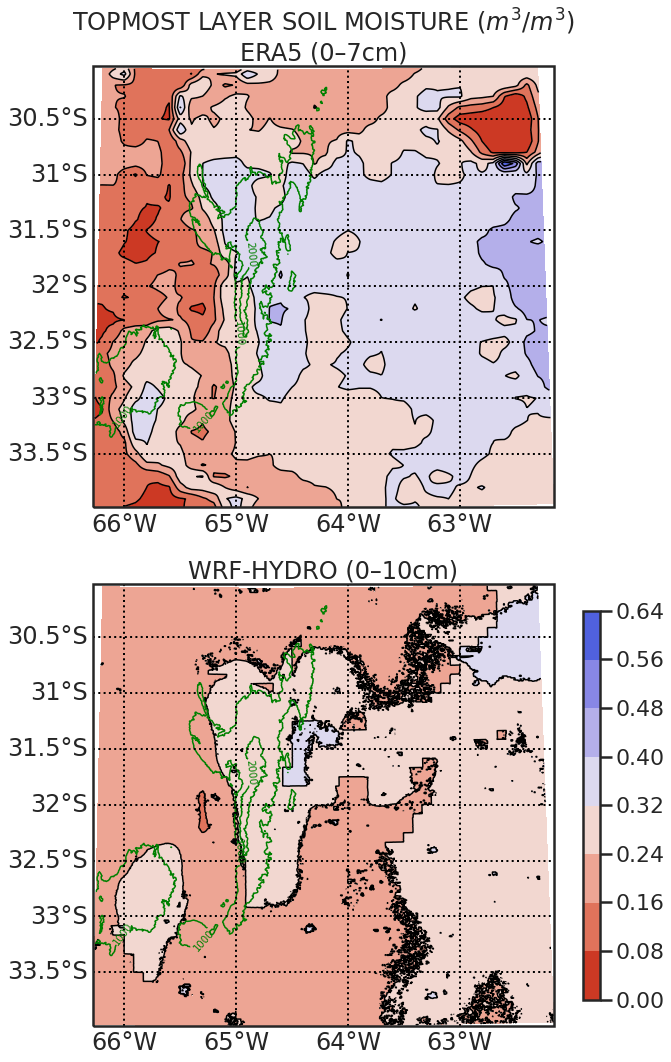

In [12]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = np.arange(250., 291., 5.)
levs = np.arange(0., 0.65, 0.08)
# levs = None
tlevs = np.arange(0., 6001., 1000.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_M'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax1.clabel(tct, inline=1, fontsize=10, fmt='%4.0f')
ct = ax1.contourf(wrf_lons, wrf_lats,  wrf['SOIL_M'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('WRF-HYDRO (0–10cm)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, swvl1_era[0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm_r)
tct2 = ax2.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax2.clabel(tct2, inline=1, fontsize=10, fmt='%4.0f')
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'TOPMOST LAYER SOIL MOISTURE ($m^3/m^3$)' '\n' 'ERA5 (0–7cm)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()

<ipython-input-13-09c35e2d2786>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_T'][0,:,0,:],
<ipython-input-13-09c35e2d2786>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
<ipython-input-13-09c35e2d2786>:21: DeprecationWarning: `np.bool` 

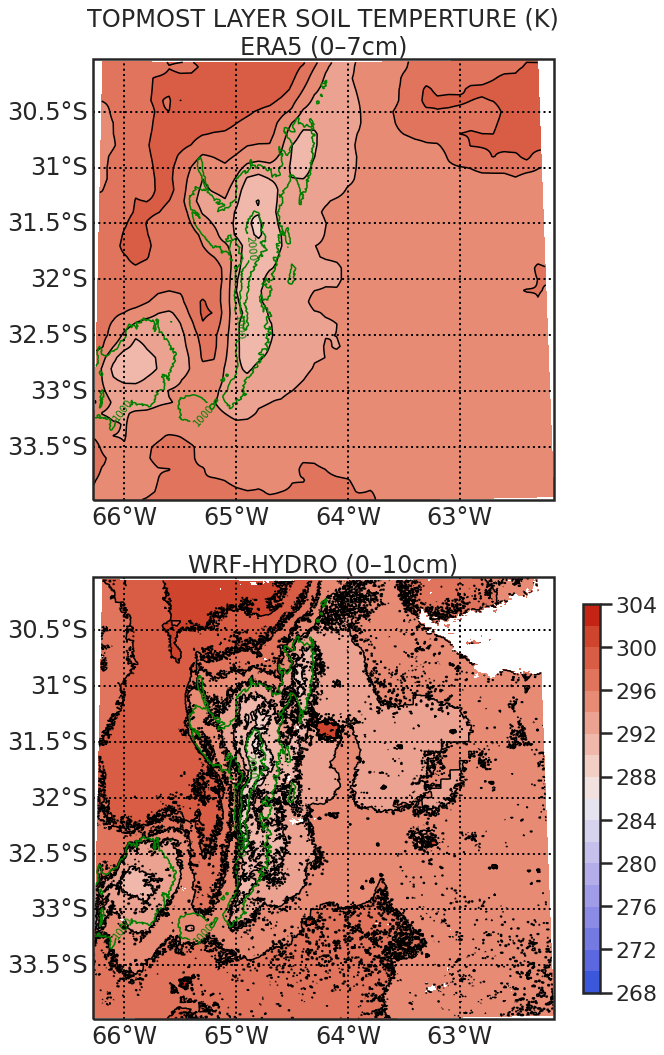

In [13]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

# levs = None
levs = np.arange(268., 304.1, 2.)
tlevs = np.arange(0., 6001., 1000.)

fig = plt.figure(figsize=(8, 18))

ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.4], projection=crs.PlateCarree())
ax1.contour(wrf_lons, wrf_lats, wrf['SOIL_T'][0,:,0,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
tct = ax1.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax1.clabel(tct, inline=1, fontsize=10, fmt='%4.0f')
ct = ax1.contourf(wrf_lons, wrf_lats,  wrf['SOIL_T'][0,:,0, :],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
ax1.set_xlim(wrf_lons.min(), wrf_lons.max())
ax1.set_ylim(wrf_lats.min(), wrf_lats.max())
gl1 = ax1.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
gl1.top_labels = False 
ax1.set_title('WRF-HYDRO (0–10cm)')
ax2 = fig.add_axes([0.05, 0.45, 0.8, 0.4], projection=crs.PlateCarree())
ax2.contour(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            linewidths = 1.5,
            colors="black")
ax2.contourf(wrf_lons, wrf_lats, stl1_era[0,:,:],
            levels=levs,
            extend='neither',
            cmap=cc.cm.coolwarm)
tct2 = ax2.contour(wrf_lons, wrf_lats, geogrid['HGT_M'][0, :,:],
            levels=tlevs,
            linewidths = 1.5,
            colors="green")
ax2.clabel(tct2, inline=1, fontsize=10, fmt='%4.0f')
ax2.set_xlim(wrf_lons.min(), wrf_lons.max())
ax2.set_ylim(wrf_lats.min(), wrf_lats.max())
gl2 = ax2.gridlines(color="black", linestyle="dotted", draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False
gl2.top_labels = False 
ax2.set_title(r'TOPMOST LAYER SOIL TEMPERTURE (K)' '\n' 'ERA5 (0–7cm)')
cax = fig.add_axes([0.9, 0.1, 0.03, 0.3])
plt.colorbar(ct, cax=cax)
plt.show()